## PROBLEM STATEMENT

### British Airways faces the challenge of accurately forecasting lounge demand at Heathrow Terminal 3 amid changing flight schedules and fleet strategies. Traditional forecasting methods require precise flight- and aircraft-level data, which may not always be available. To address this, a scalable and flexible lookup model is needed to estimate lounge eligibility percentages across meaningful flight groupings, such as time of day, route type, and regional destination. This will enable the Airport Planning team to anticipate lounge usage, optimize capacity, and ensure premium service delivery for eligible customers.

### 1.Flight Volume Patterns
How does the daily flight schedule at Heathrow Terminal 3 vary across morning, afternoon, and evening departure windows,
and what does this imply for lounge traffic peaks

What is the hourly departure profile, and which time slots are most critical for lounge resource planning?

2. Route Type & Mix

How do short-haul vs. long-haul flights differ in terms of departure timing and cabin configuration?

Do short-haul flights contribute meaningfully to lounge demand, or is demand primarily concentrated on long-haul operations?

3. Regional Demand Insights

Which regional destinations contribute the largest share of premium cabins (First/Business) in the schedule?

Are certain regions (e.g., North America, Asia-Pacific) disproportionately aligned with peak lounge times?

4. Cabin Class Distribution

What percentage of flights include First Class, and how does this vary across route types and regions?

Which departure windows have the highest density of Business Class seats, and how does this translate to expected lounge utilization?

5. Passenger Eligibility Assumptions

Based on assumed eligibility percentages, which flight groupings (time + route type + region) yield the highest volume of eligible passengers?

How significant is the contribution of loyalty-based eligibility (Economy + frequent flyers) compared to premium cabins?

6. Demand Concentration & Bottlenecks

Which 3–5 groupings (e.g., evening long-haul North America, morning Europe short-haul) generate the majority of total lounge demand?

Are there identifiable bottleneck periods where demand is likely to exceed available lounge capacity?

7. Scenario & Sensitivity Testing


In [1]:
%matplotlib inline

## LOADING LIBRAEIES

In [79]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [80]:


file_path = r"C:\Users\praya\OneDrive\Documents\pgda43\python\Project\British Airways Summer Schedule Dataset - Forage Data Science Task 1.xlsx"

# Load the first sheet
df = pd.read_excel(file_path)

df


,FLIGHT_DATE,FLIGHT_TIME,TIME_OF_DAY,AIRLINE_CD,FLIGHT_NO,DEPARTURE_STATION_CD,ARRIVAL_STATION_CD,ARRIVAL_COUNTRY,ARRIVAL_REGION,HAUL,AIRCRAFT_TYPE,FIRST_CLASS_SEATS,BUSINESS_CLASS_SEATS,ECONOMY_SEATS,TIER1_ELIGIBLE_PAX,TIER2_ELIGIBLE_PAX,TIER3_ELIGIBLE_PAX
0,2025-09-02,14:19:00,Afternoon,BA,BA5211,LHR,LAX,USA,North America,LONG,B777,8,49,178,0,10,38
1,2025-06-10,06:42:00,Morning,BA,BA7282,LHR,LAX,USA,North America,LONG,B777,8,49,178,0,7,28
2,2025-10-27,15:33:00,Afternoon,BA,BA1896,LHR,FRA,Germany,Europe,SHORT,A320,0,17,163,0,11,40
3,2025-06-15,18:29:00,Evening,BA,BA5497,LHR,IST,Turkey,Europe,SHORT,A320,0,8,172,0,16,54
4,2025-08-25,20:35:00,Evening,BA,BA1493,LHR,FRA,Germany,Europe,SHORT,A320,0,13,167,0,6,27
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,2025-06-07,22:04:00,Evening,BA,BA7039,LHR,VIE,Austria,Europe,SHORT,A320,0,7,173,1,15,51
9996,2025-04-22,15:15:00,Afternoon,BA,BA9712,LHR,ORD,USA,North America,LONG,B777,8,49,178,1,0,0
9997,2025-08-16,06:11:00,Morning,BA,BA7513,LHR,HND,Japan,Asia,LONG,B777,0,32,304,0,4,19
9998,2025-10-24,22:02:00,Evening,BA,BA9958,LHR,DXB,UAE,Middle East,LONG,B787,8,48,200,1,10,38


## UNDERSTANDING DATASET

In [81]:
df.shape

(10000, 17)

In [82]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   FLIGHT_DATE           10000 non-null  datetime64[ns]
 1   FLIGHT_TIME           10000 non-null  object        
 2   TIME_OF_DAY           10000 non-null  object        
 3   AIRLINE_CD            10000 non-null  object        
 4   FLIGHT_NO             10000 non-null  object        
 5   DEPARTURE_STATION_CD  10000 non-null  object        
 6   ARRIVAL_STATION_CD    10000 non-null  object        
 7   ARRIVAL_COUNTRY       10000 non-null  object        
 8   ARRIVAL_REGION        10000 non-null  object        
 9   HAUL                  10000 non-null  object        
 10  AIRCRAFT_TYPE         10000 non-null  object        
 11  FIRST_CLASS_SEATS     10000 non-null  int64         
 12  BUSINESS_CLASS_SEATS  10000 non-null  int64         
 13  ECONOMY_SEATS    

## CHECKING FOR DUPLICATE

In [83]:
df[df.duplicated]

,FLIGHT_DATE,FLIGHT_TIME,TIME_OF_DAY,AIRLINE_CD,FLIGHT_NO,DEPARTURE_STATION_CD,ARRIVAL_STATION_CD,ARRIVAL_COUNTRY,ARRIVAL_REGION,HAUL,AIRCRAFT_TYPE,FIRST_CLASS_SEATS,BUSINESS_CLASS_SEATS,ECONOMY_SEATS,TIER1_ELIGIBLE_PAX,TIER2_ELIGIBLE_PAX,TIER3_ELIGIBLE_PAX


In [84]:
df.isnull().sum()

FLIGHT_DATE             0
FLIGHT_TIME             0
TIME_OF_DAY             0
AIRLINE_CD              0
FLIGHT_NO               0
DEPARTURE_STATION_CD    0
ARRIVAL_STATION_CD      0
ARRIVAL_COUNTRY         0
ARRIVAL_REGION          0
HAUL                    0
AIRCRAFT_TYPE           0
FIRST_CLASS_SEATS       0
BUSINESS_CLASS_SEATS    0
ECONOMY_SEATS           0
TIER1_ELIGIBLE_PAX      0
TIER2_ELIGIBLE_PAX      0
TIER3_ELIGIBLE_PAX      0
dtype: int64

### Flight Volume Patterns

#### How does the daily flight schedule at Heathrow Terminal 3 vary across morning, afternoon, and evening departure windows, and what does this imply for lounge traffic peaks?

In [85]:
flight_counts = df['TIME_OF_DAY'].value_counts().reset_index()

flight_counts 

,TIME_OF_DAY,count
0,Morning,3530
1,Evening,2973
2,Afternoon,2305
3,Lunchtime,1192


In [147]:
flight_counts.columns = ['TIME_OF_DAY', 'Flights']
flight_counts.columns

,TIME_OF_DAY,count
0,Morning,3530
1,Evening,2973
2,Afternoon,2305
3,Lunchtime,1192


In [87]:
order = ["Morning", "Afternoon", "Evening"]

In [150]:
plt.figure(figsize=(8,5))
sns.barplot(data=flight_counts, x='TIME_OF_DAY', y='count', order=order, palette="Blues_d")

C:\Users\praya\AppData\Local\Temp\ipykernel_20424\3438028468.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=flight_counts, x='TIME_OF_DAY', y='count', order=order, palette="Blues_d")


<Axes: xlabel='TIME_OF_DAY', ylabel='count'>

#### What is the hourly departure profile, and which time slots are most critical for lounge resource planning?

In [89]:
df['FLIGHT_TIME'] = pd.to_datetime(df['FLIGHT_TIME'], format="%H:%M:%S").dt.time
df['FLIGHT_TIME']

0       14:19:00
1       06:42:00
2       15:33:00
3       18:29:00
4       20:35:00
          ...   
9995    22:04:00
9996    15:15:00
9997    06:11:00
9998    22:02:00
9999    22:00:00
Name: FLIGHT_TIME, Length: 10000, dtype: object

In [90]:
df['HOUR'] = pd.to_datetime(df['FLIGHT_TIME'], format="%H:%M:%S").dt.hour
df['HOUR']

0       14
1        6
2       15
3       18
4       20
        ..
9995    22
9996    15
9997     6
9998    22
9999    22
Name: HOUR, Length: 10000, dtype: int32

In [91]:
hourly_departures = df.groupby('HOUR').size().reset_index(name='Flights')
hourly_departures

,HOUR,Flights
0,6,564
1,7,558
2,8,642
3,9,597
4,10,604
5,11,565
6,12,598
7,13,594
8,14,566
9,15,568


C:\Users\praya\AppData\Local\Temp\ipykernel_20424\2288695076.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='HOUR', y='Flights', data=hourly_departures, palette="Blues_d")


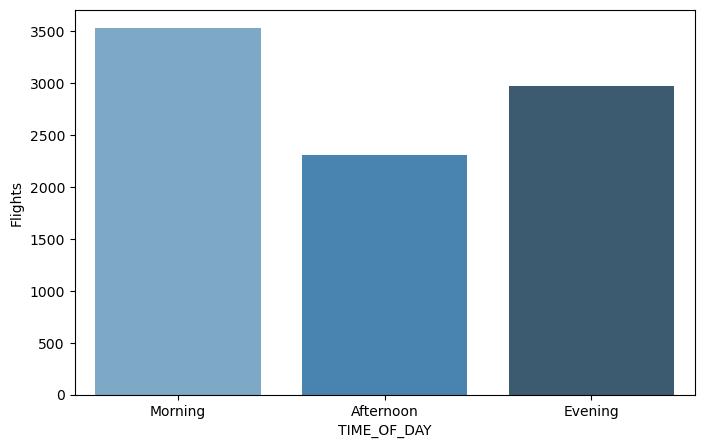

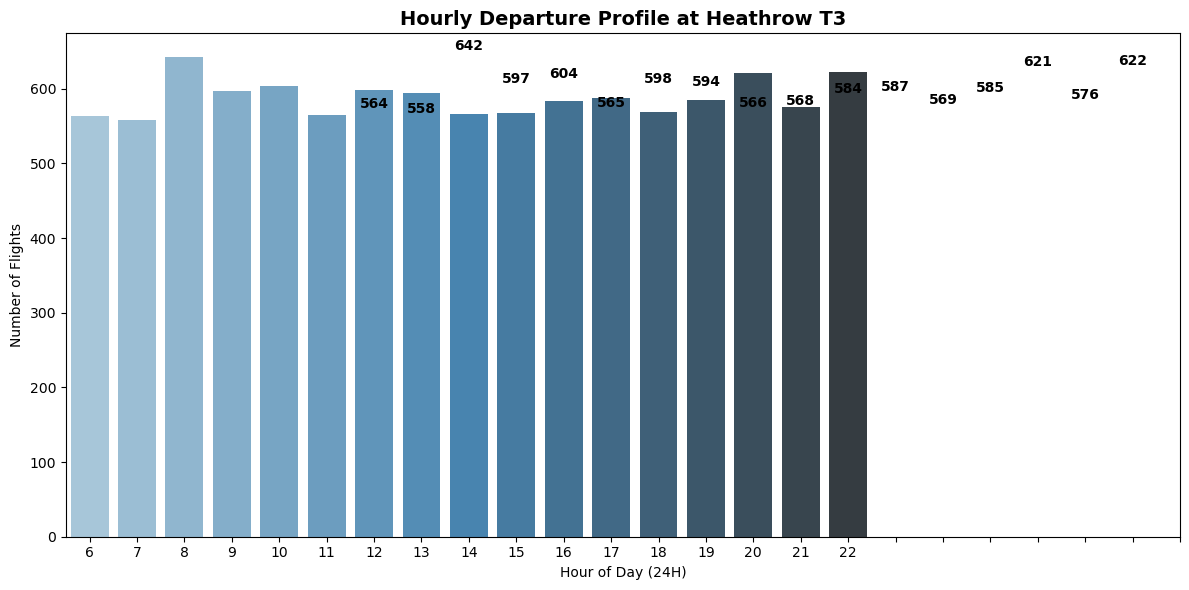

In [92]:
plt.figure(figsize=(12,6))
sns.barplot(x='HOUR', y='Flights', data=hourly_departures, palette="Blues_d")

for index, row in hourly_departures.iterrows():
    plt.text(row['HOUR'], row['Flights'] + 10, row['Flights'], ha='center', fontsize=10, fontweight='bold')

plt.title("Hourly Departure Profile at Heathrow T3", fontsize=14, fontweight='bold')
plt.xlabel("Hour of Day (24H)")
plt.ylabel("Number of Flights")
plt.xticks(range(0,24))
plt.tight_layout()
plt.show()

### 2. Route Type & Mix

#### How do short-haul vs. long-haul flights differ in terms of departure timing and cabin configuration?

In [93]:
# 1. Group by HAUL and hour
df['HOUR'] = pd.to_datetime(df['FLIGHT_TIME'], format="%H:%M:%S").dt.hour
df['HOUR']

0       14
1        6
2       15
3       18
4       20
        ..
9995    22
9996    15
9997     6
9998    22
9999    22
Name: HOUR, Length: 10000, dtype: int32

In [94]:
haul_timing = df.groupby(['HAUL','HOUR']).size().reset_index(name='Flights')
haul_timing

,HAUL,HOUR,Flights
0,LONG,6,237
1,LONG,7,224
2,LONG,8,290
3,LONG,9,239
4,LONG,10,235
5,LONG,11,236
6,LONG,12,214
7,LONG,13,221
8,LONG,14,226
9,LONG,15,250


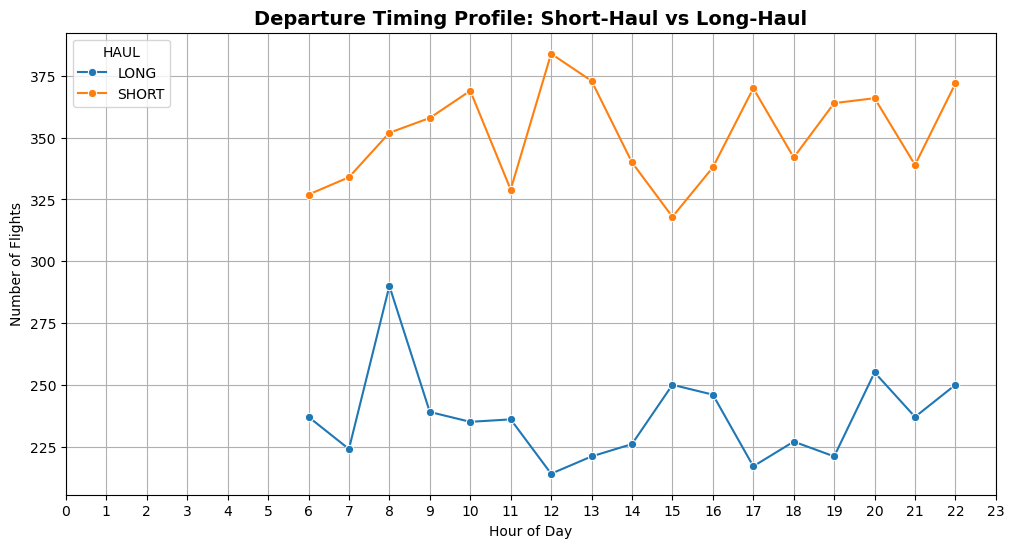

In [95]:

plt.figure(figsize=(12,6))
sns.lineplot(x='HOUR', y='Flights', hue='HAUL', data=haul_timing, marker="o")
plt.title("Departure Timing Profile: Short-Haul vs Long-Haul", fontsize=14, fontweight='bold')
plt.xlabel("Hour of Day")
plt.ylabel("Number of Flights")
plt.xticks(range(0,24))
plt.grid(True)
plt.show()

In [96]:
# 2. Compare average cabin seats by HAUL
cabin_mix = df.groupby('HAUL')[['FIRST_CLASS_SEATS','BUSINESS_CLASS_SEATS','ECONOMY_SEATS']].mean().reset_index()
cabin_mix



,HAUL,FIRST_CLASS_SEATS,BUSINESS_CLASS_SEATS,ECONOMY_SEATS
0,LONG,3.843975,47.406708,240.567702
1,SHORT,0.000000,10.029456,169.970544


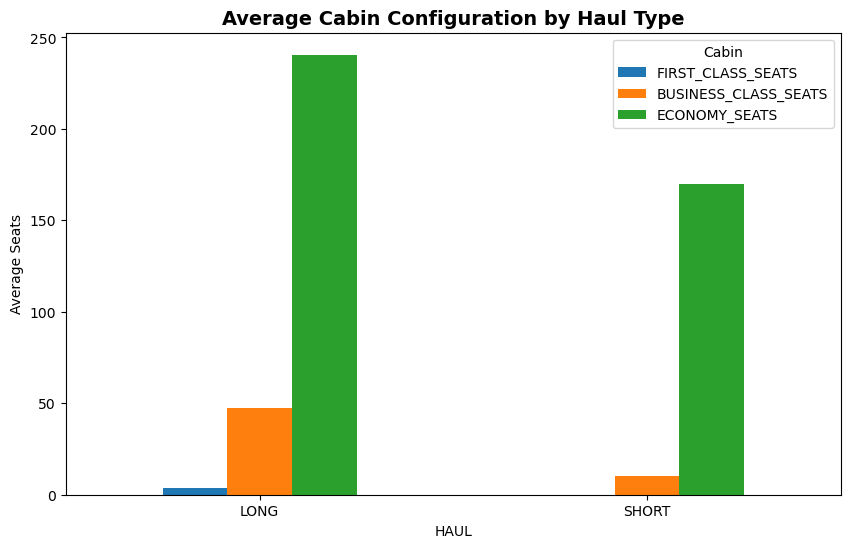

In [97]:
cabin_mix.plot(x='HAUL', kind='bar', figsize=(10,6))
plt.title("Average Cabin Configuration by Haul Type", fontsize=14, fontweight='bold')
plt.ylabel("Average Seats")
plt.xticks(rotation=0)
plt.legend(title="Cabin")
plt.show()

#### Do short-haul flights contribute meaningfully to lounge demand, or is demand primarily concentrated on long-haul operations?

In [98]:
df['LOUNGE_ELIGIBLE'] = df['TIER1_ELIGIBLE_PAX'] + df['TIER2_ELIGIBLE_PAX'] + df['TIER3_ELIGIBLE_PAX']
df['LOUNGE_ELIGIBLE']

0       48
1       35
2       51
3       70
4       33
        ..
9995    67
9996     1
9997    23
9998    49
9999    53
Name: LOUNGE_ELIGIBLE, Length: 10000, dtype: int64

In [99]:
haul_demand = df.groupby('HAUL')['LOUNGE_ELIGIBLE'].sum().reset_index()
haul_demand

,HAUL,LOUNGE_ELIGIBLE
0,LONG,157568
1,SHORT,232242


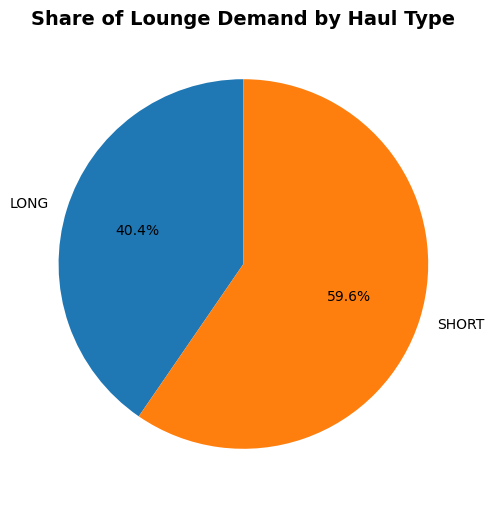

In [100]:
plt.figure(figsize=(6,6))
plt.pie(haul_demand['LOUNGE_ELIGIBLE'], labels=haul_demand['HAUL'], autopct='%1.1f%%', startangle=90)
plt.title("Share of Lounge Demand by Haul Type", fontsize=14, fontweight='bold')
plt.show()

### 3. Regional Demand Insights

#### Which regional destinations contribute the largest share of premium cabins (First/Business) in the schedule?

In [101]:
df['PREMIUM_SEATS'] = df['FIRST_CLASS_SEATS'] + df['BUSINESS_CLASS_SEATS']
df['PREMIUM_SEATS']

0       57
1       57
2       17
3        8
4       13
        ..
9995     7
9996    57
9997    32
9998    56
9999    35
Name: PREMIUM_SEATS, Length: 10000, dtype: int64

In [102]:
region_premium = (
    df.groupby('ARRIVAL_REGION')[['PREMIUM_SEATS', 'ECONOMY_SEATS']]
      .sum()
      .reset_index()
)

# Calculate premium share
region_premium['PREMIUM_SHARE_%'] = (
    region_premium['PREMIUM_SEATS'] / 
    (region_premium['PREMIUM_SEATS'] + region_premium['ECONOMY_SEATS'])
) * 100
region_premium

,ARRIVAL_REGION,PREMIUM_SEATS,ECONOMY_SEATS,PREMIUM_SHARE_%
0,Asia,34644,162711,17.554154
1,Europe,59926,1015574,5.571920
2,Middle East,34845,165802,17.366320
3,North America,136795,639772,17.615351


C:\Users\praya\AppData\Local\Temp\ipykernel_20424\1427611927.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


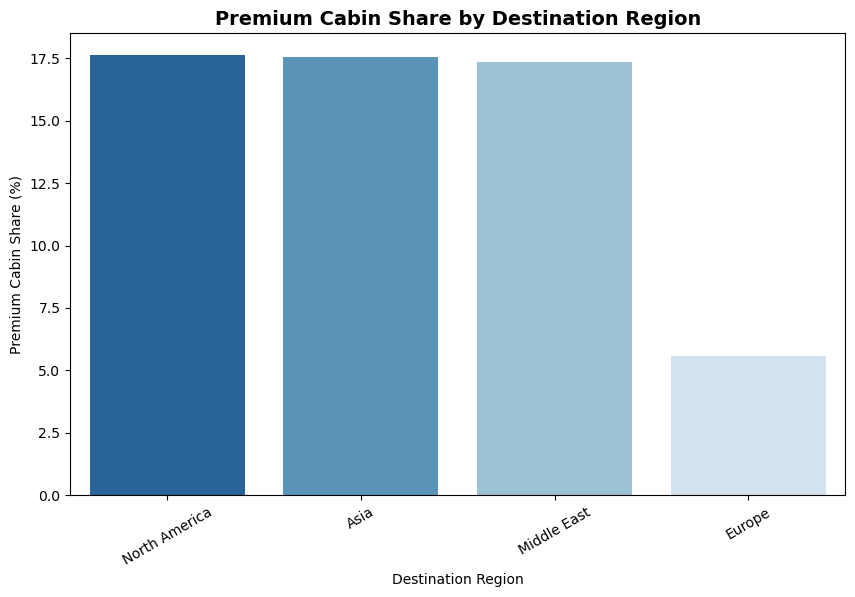

In [103]:
plt.figure(figsize=(10,6))
sns.barplot(
    data=region_premium.sort_values('PREMIUM_SHARE_%', ascending=False),
    x='ARRIVAL_REGION', y='PREMIUM_SHARE_%', palette='Blues_r'
)
plt.title("Premium Cabin Share by Destination Region", fontsize=14, fontweight='bold')
plt.xlabel("Destination Region")
plt.ylabel("Premium Cabin Share (%)")
plt.xticks(rotation=30)
plt.show()


#### Are certain regions (e.g., North America, Asia-Pacific) disproportionately aligned with peak lounge times?

In [104]:
df['DEP_HOUR'] = pd.to_datetime(df['FLIGHT_TIME'], format='%H:%M:%S').dt.hour
df['DEP_HOUR']

0       14
1        6
2       15
3       18
4       20
        ..
9995    22
9996    15
9997     6
9998    22
9999    22
Name: DEP_HOUR, Length: 10000, dtype: int32

In [105]:
region_hourly = (
    df.groupby(['ARRIVAL_REGION', 'DEP_HOUR'])
      [['FIRST_CLASS_SEATS','BUSINESS_CLASS_SEATS','ECONOMY_SEATS']]
      .sum()
      .reset_index()
)

# Add total premium
region_hourly['PREMIUM_SEATS'] = (
    region_hourly['FIRST_CLASS_SEATS'] + region_hourly['BUSINESS_CLASS_SEATS']
)
region_hourly

,ARRIVAL_REGION,DEP_HOUR,FIRST_CLASS_SEATS,BUSINESS_CLASS_SEATS,ECONOMY_SEATS,PREMIUM_SEATS
0,Asia,6,138,1802,8897,1940
1,Asia,7,150,1472,7092,1622
2,Asia,8,180,1997,10295,2177
3,Asia,9,136,1894,9911,2030
4,Asia,10,152,2193,10848,2345
...,...,...,...,...,...,...
63,North America,18,442,6386,33677,6828
64,North America,19,572,7089,35746,7661
65,North America,20,670,8094,39672,8764
66,North America,21,604,7110,35697,7714


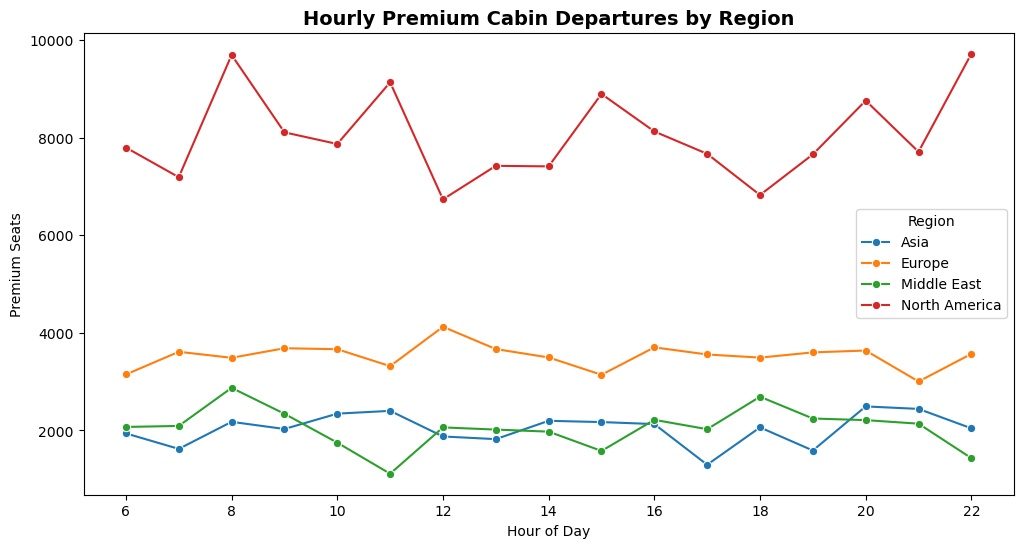

In [106]:
plt.figure(figsize=(12,6))
sns.lineplot(
    data=region_hourly, 
    x='DEP_HOUR', y='PREMIUM_SEATS', hue='ARRIVAL_REGION', marker="o"
)
plt.title("Hourly Premium Cabin Departures by Region", fontsize=14, fontweight='bold')
plt.xlabel("Hour of Day")
plt.ylabel("Premium Seats")
plt.legend(title="Region")
plt.show()


### 4.Cabin Class Distribution

In [107]:
df['HAS_FIRST'] = df['FIRST_CLASS_SEATS'] > 0
df['HAS_FIRST'] 

0        True
1        True
2       False
3       False
4       False
        ...  
9995    False
9996     True
9997    False
9998     True
9999    False
Name: HAS_FIRST, Length: 10000, dtype: bool

In [31]:
overall_first_pct = df['HAS_FIRST'].mean() * 100
print(f"Overall, {overall_first_pct:.1f}% of flights have First Class.")


Overall, 16.5% of flights have First Class.


In [108]:
haul_first = (
    df.groupby('HAUL')['HAS_FIRST']
      .mean()
      .reset_index()
)
haul_first['HAS_FIRST'] *= 100  # convert to %
haul_first

,HAUL,HAS_FIRST
0,LONG,41.043478
1,SHORT,0.000000


C:\Users\praya\AppData\Local\Temp\ipykernel_20424\908411133.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=haul_first, x='HAUL', y='HAS_FIRST', palette="muted")


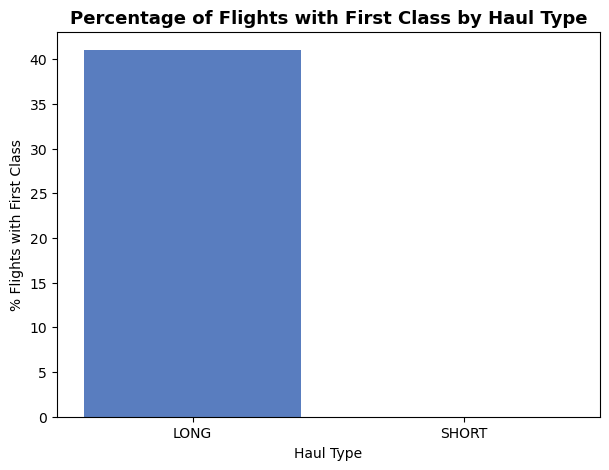

In [109]:
plt.figure(figsize=(7,5))
sns.barplot(data=haul_first, x='HAUL', y='HAS_FIRST', palette="muted")
plt.title("Percentage of Flights with First Class by Haul Type", fontsize=13, fontweight='bold')
plt.ylabel("% Flights with First Class")
plt.xlabel("Haul Type")
plt.show()

In [110]:
region_first = (
    df.groupby('ARRIVAL_REGION')['HAS_FIRST']
      .mean()
      .reset_index()
)
region_first['HAS_FIRST'] *= 100
region_first

,ARRIVAL_REGION,HAS_FIRST
0,Asia,40.353461
1,Europe,0.000000
2,Middle East,40.988372
3,North America,41.234011


C:\Users\praya\AppData\Local\Temp\ipykernel_20424\2085622166.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=region_first, x='ARRIVAL_REGION', y='HAS_FIRST', palette="deep")


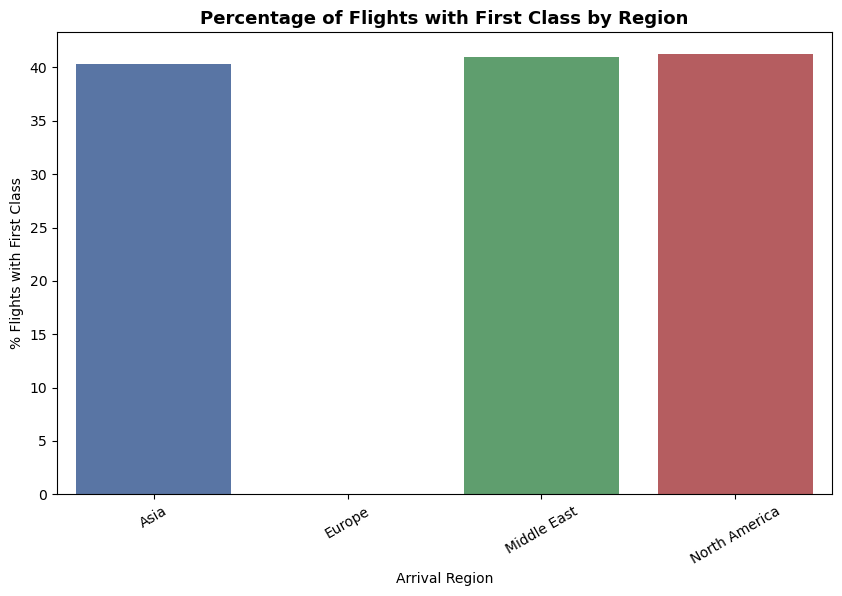

In [111]:
plt.figure(figsize=(10,6))
sns.barplot(data=region_first, x='ARRIVAL_REGION', y='HAS_FIRST', palette="deep")
plt.title("Percentage of Flights with First Class by Region", fontsize=13, fontweight='bold')
plt.ylabel("% Flights with First Class")
plt.xlabel("Arrival Region")
plt.xticks(rotation=30)
plt.show()


#### Which departure windows have the highest density of Business Class seats, and how does this translate to expected lounge utilization?

In [112]:
df['FLIGHT_TIME'] = pd.to_datetime(df['FLIGHT_TIME'], format="%H:%M:%S").dt.time
df['FLIGHT_TIME']

0       14:19:00
1       06:42:00
2       15:33:00
3       18:29:00
4       20:35:00
          ...   
9995    22:04:00
9996    15:15:00
9997    06:11:00
9998    22:02:00
9999    22:00:00
Name: FLIGHT_TIME, Length: 10000, dtype: object

In [37]:
df['HOUR'] = pd.to_datetime(df['FLIGHT_TIME'], format="%H:%M:%S").dt.hour
df['HOUR']

0       14
1        6
2       15
3       18
4       20
        ..
9995    22
9996    15
9997     6
9998    22
9999    22
Name: HOUR, Length: 10000, dtype: int32

In [38]:
df['FLIGHT_HOUR'] = pd.to_datetime(df['FLIGHT_TIME'].astype(str), format="%H:%M", errors='coerce').dt.hour

bins   = [0, 6, 12, 18, 24]
labels = ["Late Night (00-06)", "Morning (06-12)", "Afternoon (12-18)", "Evening (18-24)"]

df['DEPARTURE_WINDOW'] = pd.cut(df['FLIGHT_HOUR'], bins=bins, labels=labels, right=False)
df['DEPARTURE_WINDOW'] 

0       NaN
1       NaN
2       NaN
3       NaN
4       NaN
       ... 
9995    NaN
9996    NaN
9997    NaN
9998    NaN
9999    NaN
Name: DEPARTURE_WINDOW, Length: 10000, dtype: category
Categories (4, object): ['Late Night (00-06)' < 'Morning (06-12)' < 'Afternoon (12-18)' < 'Evening (18-24)']

In [39]:
business_density = (
    df.groupby('DEPARTURE_WINDOW')['BUSINESS_CLASS_SEATS']
      .sum()
      .reset_index()
      .sort_values('BUSINESS_CLASS_SEATS', ascending=False)
)
business_density

C:\Users\praya\AppData\Local\Temp\ipykernel_20424\270134584.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('DEPARTURE_WINDOW')['BUSINESS_CLASS_SEATS']


,DEPARTURE_WINDOW,BUSINESS_CLASS_SEATS
0,Late Night (00-06),0
1,Morning (06-12),0
2,Afternoon (12-18),0
3,Evening (18-24),0


C:\Users\praya\AppData\Local\Temp\ipykernel_20424\3032276327.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=business_density, x='DEPARTURE_WINDOW', y='BUSINESS_CLASS_SEATS', palette="Blues_d")


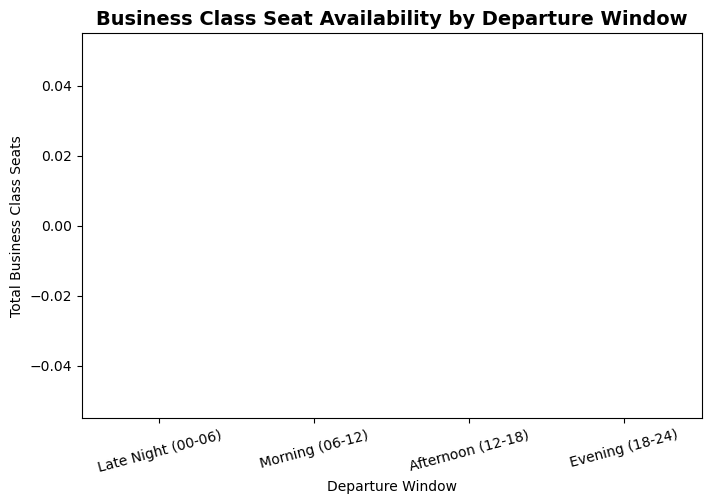

In [40]:
plt.figure(figsize=(8,5))
sns.barplot(data=business_density, x='DEPARTURE_WINDOW', y='BUSINESS_CLASS_SEATS', palette="Blues_d")
plt.title("Business Class Seat Availability by Departure Window", fontsize=14, fontweight='bold')
plt.ylabel("Total Business Class Seats")
plt.xlabel("Departure Window")
plt.xticks(rotation=15)
plt.show()


### 5. Passenger Eligibility Assumptions

#### Based on assumed eligibility percentages, which flight groupings (time + route type + region) yield the highest volume of eligible passengers?

In [113]:
df["TOTAL_ELIGIBLE_PAX"] = ( df["TIER1_ELIGIBLE_PAX"] + df["TIER2_ELIGIBLE_PAX"] + df["TIER3_ELIGIBLE_PAX"])

df["TOTAL_ELIGIBLE_PAX"]

0       48
1       35
2       51
3       70
4       33
        ..
9995    67
9996     1
9997    23
9998    49
9999    53
Name: TOTAL_ELIGIBLE_PAX, Length: 10000, dtype: int64

In [114]:
grouped = (
    df.groupby(["TIME_OF_DAY", "HAUL", "ARRIVAL_REGION"], as_index=False)
    ["TOTAL_ELIGIBLE_PAX"].sum()
    .sort_values("TOTAL_ELIGIBLE_PAX", ascending=False))
grouped 

,TIME_OF_DAY,HAUL,ARRIVAL_REGION,TOTAL_ELIGIBLE_PAX
15,Morning,SHORT,Europe,79850
7,Evening,SHORT,Europe,69887
3,Afternoon,SHORT,Europe,52231
14,Morning,LONG,North America,38977
11,Lunchtime,SHORT,Europe,30274
6,Evening,LONG,North America,30266
2,Afternoon,LONG,North America,24730
10,Lunchtime,LONG,North America,10998
13,Morning,LONG,Middle East,9818
12,Morning,LONG,Asia,9334


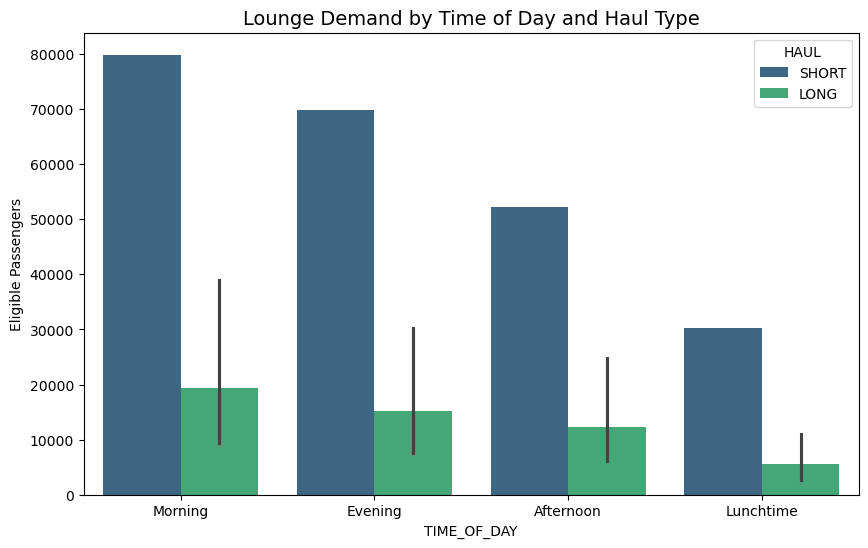

In [115]:
plt.figure(figsize=(10,6))
sns.barplot(data=grouped, x="TIME_OF_DAY", y="TOTAL_ELIGIBLE_PAX", hue="HAUL", palette="viridis")
plt.title("Lounge Demand by Time of Day and Haul Type", fontsize=14)
plt.ylabel("Eligible Passengers")
plt.show()

#### How significant is the contribution of loyalty-based eligibility (Economy + frequent flyers) compared to premium cabins?

In [116]:
df["Premium_Pax"] = df["FIRST_CLASS_SEATS"] + df["BUSINESS_CLASS_SEATS"]
df["Premium_Pax"] 

0       57
1       57
2       17
3        8
4       13
        ..
9995     7
9996    57
9997    32
9998    56
9999    35
Name: Premium_Pax, Length: 10000, dtype: int64

In [117]:
df["Loyalty_Pax"] = df["TIER1_ELIGIBLE_PAX"] + df["TIER2_ELIGIBLE_PAX"] + df["TIER3_ELIGIBLE_PAX"]
df["Loyalty_Pax"] 

0       48
1       35
2       51
3       70
4       33
        ..
9995    67
9996     1
9997    23
9998    49
9999    53
Name: Loyalty_Pax, Length: 10000, dtype: int64

In [118]:
region_summary = df.groupby("ARRIVAL_REGION")[["Premium_Pax", "Loyalty_Pax"]].sum().reset_index()
region_summary 

,ARRIVAL_REGION,Premium_Pax,Loyalty_Pax
0,Asia,34644,26134
1,Europe,59926,232242
2,Middle East,34845,26463
3,North America,136795,104971


In [119]:
region_melted = region_summary.melt(id_vars="ARRIVAL_REGION", 
                                    value_vars=["Premium_Pax", "Loyalty_Pax"], 
                                    var_name="Type", 
                                    value_name="Passengers")
region_melted

,ARRIVAL_REGION,Type,Passengers
0,Asia,Premium_Pax,34644
1,Europe,Premium_Pax,59926
2,Middle East,Premium_Pax,34845
3,North America,Premium_Pax,136795
4,Asia,Loyalty_Pax,26134
5,Europe,Loyalty_Pax,232242
6,Middle East,Loyalty_Pax,26463
7,North America,Loyalty_Pax,104971


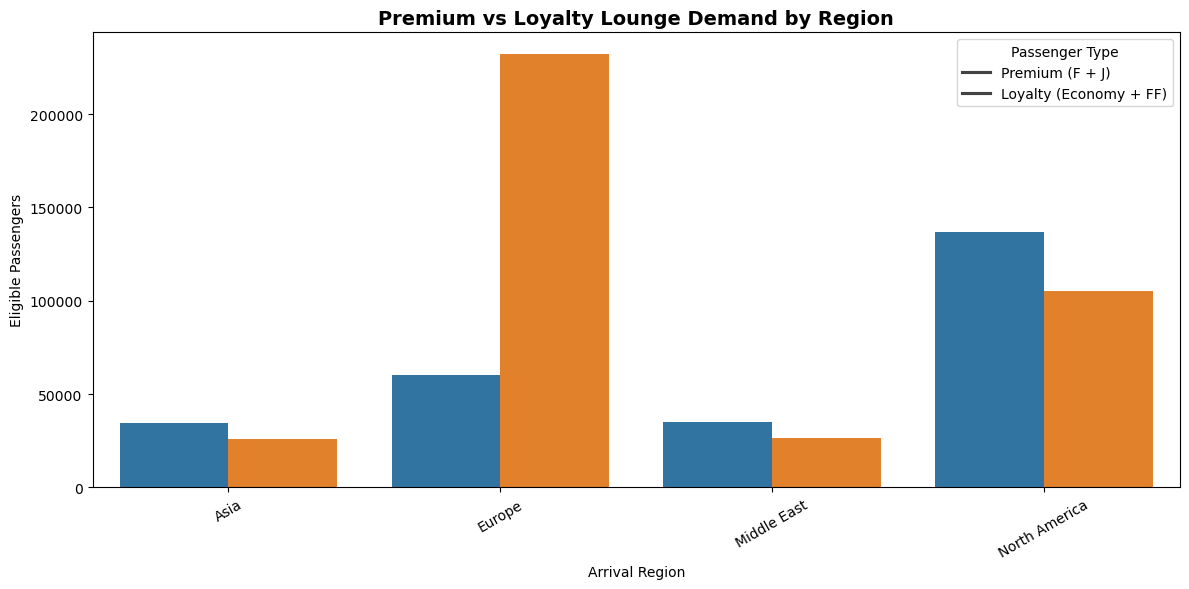

In [121]:
plt.figure(figsize=(12,6))
sns.barplot(data=region_melted, x="ARRIVAL_REGION", y="Passengers", hue="Type")

plt.title("Premium vs Loyalty Lounge Demand by Region", fontsize=14, fontweight="bold")
plt.xlabel("Arrival Region")
plt.ylabel("Eligible Passengers")
plt.xticks(rotation=30)
plt.legend(title="Passenger Type", labels=["Premium (F + J)", "Loyalty (Economy + FF)"])
plt.tight_layout()
plt.show()

### 6.Demand Concentration & Bottlenecks

#### Which 3–5 groupings (e.g., evening long-haul North America, morning Europe short-haul) generate the majority of total lounge demand?

In [122]:
df["Premium_Pax"] = df["FIRST_CLASS_SEATS"] + df["BUSINESS_CLASS_SEATS"]
df["Premium_Pax"]

0       57
1       57
2       17
3        8
4       13
        ..
9995     7
9996    57
9997    32
9998    56
9999    35
Name: Premium_Pax, Length: 10000, dtype: int64

In [123]:
df["Loyalty_Pax"] = df["TIER1_ELIGIBLE_PAX"] + df["TIER2_ELIGIBLE_PAX"] + df["TIER3_ELIGIBLE_PAX"]
df["Loyalty_Pax"]

0       48
1       35
2       51
3       70
4       33
        ..
9995    67
9996     1
9997    23
9998    49
9999    53
Name: Loyalty_Pax, Length: 10000, dtype: int64

In [124]:
df["Total_Eligible"] = df["Premium_Pax"] + df["Loyalty_Pax"]
df["Total_Eligible"]

0       105
1        92
2        68
3        78
4        46
       ... 
9995     74
9996     58
9997     55
9998    105
9999     88
Name: Total_Eligible, Length: 10000, dtype: int64

In [125]:
grouped = (df.groupby(["TIME_OF_DAY", "HAUL", "ARRIVAL_REGION"])
             ["Total_Eligible"].sum()
             .reset_index()
             .sort_values("Total_Eligible", ascending=False))
grouped 

,TIME_OF_DAY,HAUL,ARRIVAL_REGION,Total_Eligible
15,Morning,SHORT,Europe,100772
14,Morning,LONG,North America,88797
7,Evening,SHORT,Europe,87195
6,Evening,LONG,North America,70958
3,Afternoon,SHORT,Europe,66132
2,Afternoon,LONG,North America,56848
11,Lunchtime,SHORT,Europe,38069
10,Lunchtime,LONG,North America,25163
13,Morning,LONG,Middle East,22062
12,Morning,LONG,Asia,21850


In [126]:
top_groups = grouped.head(5)
top_groups

,TIME_OF_DAY,HAUL,ARRIVAL_REGION,Total_Eligible
15,Morning,SHORT,Europe,100772
14,Morning,LONG,North America,88797
7,Evening,SHORT,Europe,87195
6,Evening,LONG,North America,70958
3,Afternoon,SHORT,Europe,66132


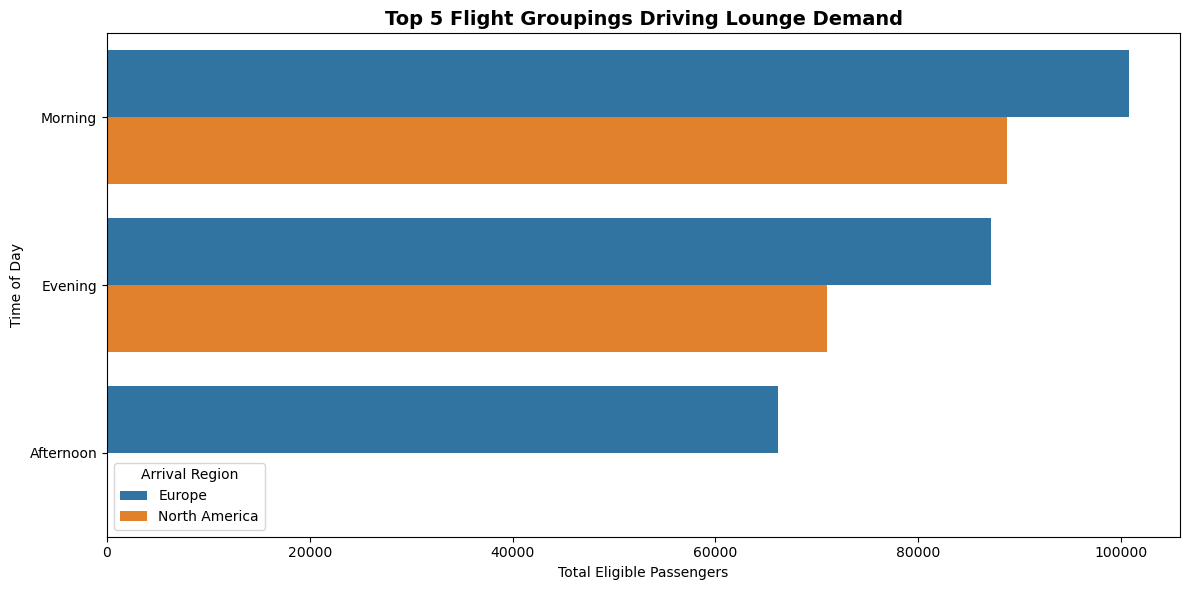

In [127]:
plt.figure(figsize=(12,6))
sns.barplot(data=top_groups, 
            x="Total_Eligible", 
            y="TIME_OF_DAY", 
            hue="ARRIVAL_REGION")

plt.title("Top 5 Flight Groupings Driving Lounge Demand", fontsize=14, fontweight="bold")
plt.xlabel("Total Eligible Passengers")
plt.ylabel("Time of Day")
plt.legend(title="Arrival Region")
plt.tight_layout()
plt.show()

#### Are there identifiable bottleneck periods where demand is likely to exceed available lounge capacity?

In [128]:
df["Premium_Pax"] = df["FIRST_CLASS_SEATS"] + df["BUSINESS_CLASS_SEATS"]
df["Premium_Pax"]

0       57
1       57
2       17
3        8
4       13
        ..
9995     7
9996    57
9997    32
9998    56
9999    35
Name: Premium_Pax, Length: 10000, dtype: int64

In [129]:
df["Loyalty_Pax"] = df["TIER1_ELIGIBLE_PAX"] + df["TIER2_ELIGIBLE_PAX"] + df["TIER3_ELIGIBLE_PAX"]
df["Loyalty_Pax"]

0       48
1       35
2       51
3       70
4       33
        ..
9995    67
9996     1
9997    23
9998    49
9999    53
Name: Loyalty_Pax, Length: 10000, dtype: int64

In [130]:
df["Total_Eligible"] = df["Premium_Pax"] + df["Loyalty_Pax"]
df["Total_Eligible"]

0       105
1        92
2        68
3        78
4        46
       ... 
9995     74
9996     58
9997     55
9998    105
9999     88
Name: Total_Eligible, Length: 10000, dtype: int64

In [131]:
df["HOUR"] = pd.to_datetime(df["FLIGHT_TIME"], format="%H:%M:%S").dt.hour
df["HOUR"]

0       14
1        6
2       15
3       18
4       20
        ..
9995    22
9996    15
9997     6
9998    22
9999    22
Name: HOUR, Length: 10000, dtype: int32

In [132]:
hourly_demand = df.groupby("HOUR")["Total_Eligible"].sum().reset_index()
hourly_demand

,HOUR,Total_Eligible
0,6,36724
1,7,36026
2,8,43517
3,9,39860
4,10,39465
5,11,37889
6,12,38360
7,13,38389
8,14,37187
9,15,37614


In [133]:
LOUNGE_CAPACITY = 300

hourly_demand["Exceeds_Capacity"] = hourly_demand["Total_Eligible"] > LOUNGE_CAPACITY
hourly_demand["Exceeds_Capacity"]

0     True
1     True
2     True
3     True
4     True
5     True
6     True
7     True
8     True
9     True
10    True
11    True
12    True
13    True
14    True
15    True
16    True
Name: Exceeds_Capacity, dtype: bool

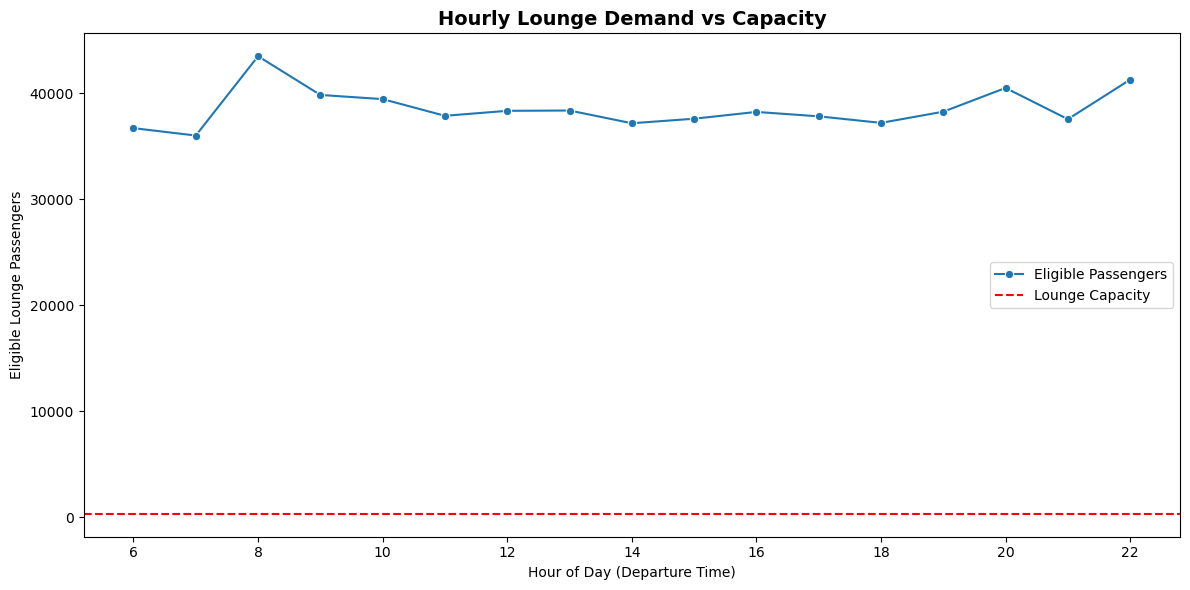

In [134]:
plt.figure(figsize=(12,6))
sns.lineplot(data=hourly_demand, x="HOUR", y="Total_Eligible", marker="o", label="Eligible Passengers")
plt.axhline(LOUNGE_CAPACITY, color="red", linestyle="--", label="Lounge Capacity")

plt.title("Hourly Lounge Demand vs Capacity", fontsize=14, fontweight="bold")
plt.xlabel("Hour of Day (Departure Time)")
plt.ylabel("Eligible Lounge Passengers")
plt.legend()
plt.tight_layout()
plt.show()

### 7.Scenario & Sensitivity Testing

#### If BA increases long-haul capacity in future schedules, which lounges will face the most pressure?

In [135]:
regional_demand = df.groupby(["ARRIVAL_REGION", "HAUL"])["Total_Eligible"].sum().reset_index()
regional_demand 

,ARRIVAL_REGION,HAUL,Total_Eligible
0,Asia,LONG,60778
1,Europe,SHORT,292168
2,Middle East,LONG,61308
3,North America,LONG,241766


In [136]:
regional_demand["Scenario_Demand"] = regional_demand.apply(
    lambda x: x["Total_Eligible"] * 1.2 if x["HAUL"] == "Long-haul" else x["Total_Eligible"], axis=1
)
regional_demand["Scenario_Demand"]

0     60778
1    292168
2     61308
3    241766
Name: Scenario_Demand, dtype: int64

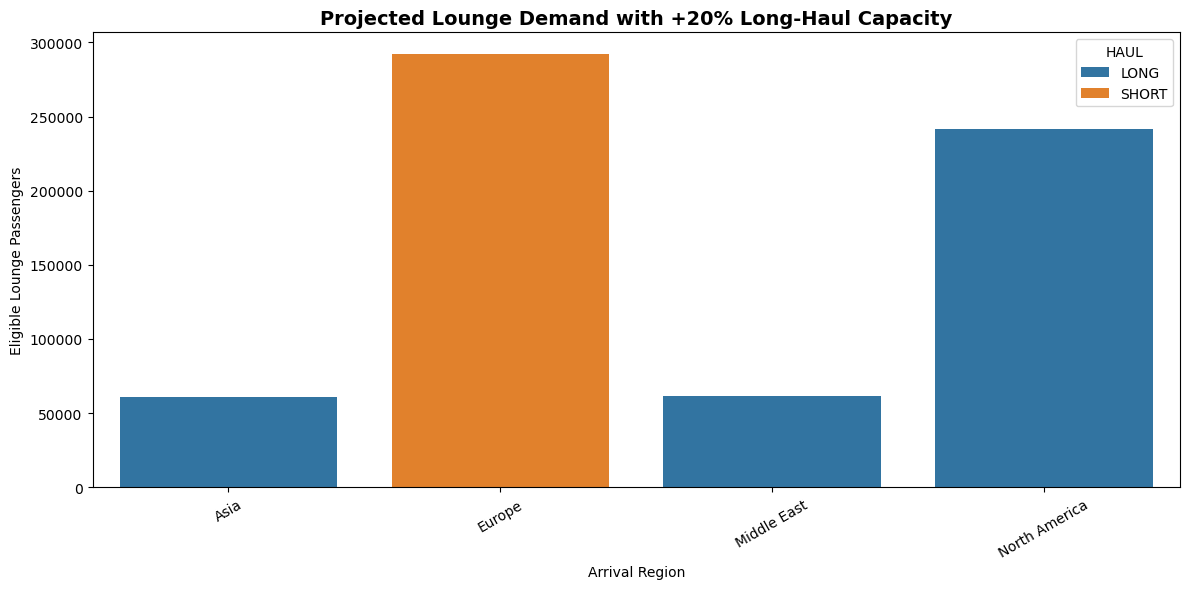

In [137]:
plt.figure(figsize=(12,6))
sns.barplot(data=regional_demand, x="ARRIVAL_REGION", y="Scenario_Demand", hue="HAUL")

plt.title("Projected Lounge Demand with +20% Long-Haul Capacity", fontsize=14, fontweight="bold")
plt.ylabel("Eligible Lounge Passengers")
plt.xlabel("Arrival Region")
plt.xticks(rotation=30)
plt.tight_layout()
plt.show()

#### How would lounge demand change if the share of premium cabins per flight were reduced or increased?

In [138]:
df["PREMIUM_SEATS"] = df["FIRST_CLASS_SEATS"] + df["BUSINESS_CLASS_SEATS"]

df["PREMIUM_SEATS"]

0       57
1       57
2       17
3        8
4       13
        ..
9995     7
9996    57
9997    32
9998    56
9999    35
Name: PREMIUM_SEATS, Length: 10000, dtype: int64

In [139]:

df["TOTAL_SEATS"] = df["PREMIUM_SEATS"] + df["ECONOMY_SEATS"]
df["TOTAL_SEATS"] 

0       235
1       235
2       180
3       180
4       180
       ... 
9995    180
9996    235
9997    336
9998    256
9999    214
Name: TOTAL_SEATS, Length: 10000, dtype: int64

In [140]:
df["ELIGIBLE_BASE"] = df["PREMIUM_SEATS"] + 0.1 * df["ECONOMY_SEATS"]

df["ELIGIBLE_BASE"] 

0       74.8
1       74.8
2       33.3
3       25.2
4       29.7
        ... 
9995    24.3
9996    74.8
9997    62.4
9998    76.0
9999    52.9
Name: ELIGIBLE_BASE, Length: 10000, dtype: float64

In [141]:
# +10% premium
df["ELIGIBLE_PLUS10"] = (df["PREMIUM_SEATS"]*1.1).clip(upper=df["TOTAL_SEATS"]) \
                        + 0.1 * (df["TOTAL_SEATS"] - df["PREMIUM_SEATS"]*1.1).clip(lower=0)

df["ELIGIBLE_PLUS10"]

0       79.93
1       79.93
2       34.83
3       25.92
4       30.87
        ...  
9995    24.93
9996    79.93
9997    65.28
9998    81.04
9999    56.05
Name: ELIGIBLE_PLUS10, Length: 10000, dtype: float64

In [69]:
# -10% premium
df["ELIGIBLE_MINUS10"] = (df["PREMIUM_SEATS"]*0.9).clip(lower=0) \
                         + 0.1 * (df["TOTAL_SEATS"] - df["PREMIUM_SEATS"]*0.9).clip(lower=0)
df["ELIGIBLE_MINUS10"]

0       69.67
1       69.67
2       31.77
3       24.48
4       28.53
        ...  
9995    23.67
9996    69.67
9997    59.52
9998    70.96
9999    49.75
Name: ELIGIBLE_MINUS10, Length: 10000, dtype: float64

In [ ]:
totals = pd.DataFrame({
    "Scenario": ["-10% Premium","Baseline","+10% Premium"],
    "Eligible Pax": [
        df["ELIGIBLE_MINUS10"].sum(),
        df["ELIGIBLE_BASE"].sum(),
        df["ELIGIBLE_PLUS10"].sum()
    ]
})
totals

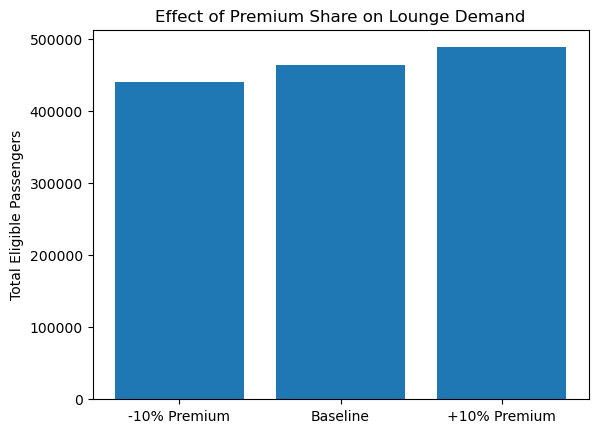

In [71]:
plt.bar(totals["Scenario"], totals["Eligible Pax"])
plt.title("Effect of Premium Share on Lounge Demand")
plt.ylabel("Total Eligible Passengers")
plt.show()

### 8 . Strategic Insights

In [143]:
df["FLIGHT_GROUP"] = df["TIME_OF_DAY"] + " | " + df["HAUL"] + " | " + df["ARRIVAL_REGION"]
df["FLIGHT_GROUP"]


0       Afternoon | LONG | North America
1         Morning | LONG | North America
2             Afternoon | SHORT | Europe
3               Evening | SHORT | Europe
4               Evening | SHORT | Europe
                      ...               
9995            Evening | SHORT | Europe
9996    Afternoon | LONG | North America
9997               Morning | LONG | Asia
9998        Evening | LONG | Middle East
9999      Evening | LONG | North America
Name: FLIGHT_GROUP, Length: 10000, dtype: object

In [144]:
# Step 2: Calculate eligible demand
df["ELIGIBLE_BASE"] = (df["FIRST_CLASS_SEATS"] + df["BUSINESS_CLASS_SEATS"] 
                       + 0.1 * df["ECONOMY_SEATS"])  
df["ELIGIBLE_BASE"]

0       74.8
1       74.8
2       33.3
3       25.2
4       29.7
        ... 
9995    24.3
9996    74.8
9997    62.4
9998    76.0
9999    52.9
Name: ELIGIBLE_BASE, Length: 10000, dtype: float64

In [145]:
heatmap_data = (
    df.groupby(["TIME_OF_DAY", "ARRIVAL_REGION"])
    ["ELIGIBLE_BASE"]
    .sum()
    .reset_index()
    .pivot(index="TIME_OF_DAY", columns="ARRIVAL_REGION", values="ELIGIBLE_BASE")
)

heatmap_data

ARRIVAL_REGION,Asia,Europe,Middle East,North America
TIME_OF_DAY,,,,
Afternoon,11455.5,37098.9,11729.2,47233.3
Evening,15532.7,47671.2,15523.6,59499.2
Lunchtime,5496.7,20641.5,5921.9,20942.1
Morning,18430.2,56071.8,18250.5,73097.6


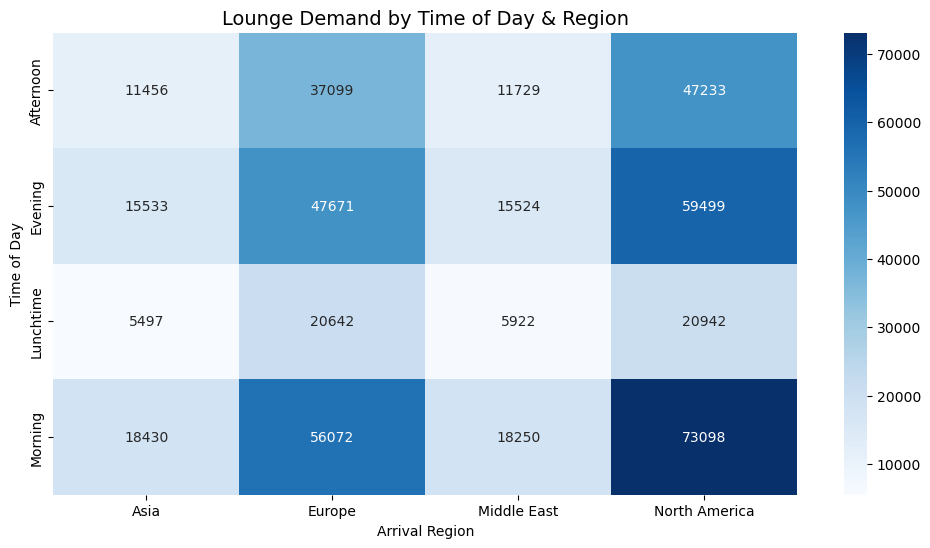

In [146]:
plt.figure(figsize=(12,6))
sns.heatmap(heatmap_data, annot=True, fmt=".0f", cmap="Blues")
plt.title("Lounge Demand by Time of Day & Region", fontsize=14)
plt.ylabel("Time of Day")
plt.xlabel("Arrival Region")
plt.show()

#### How can the lookup table support scalable forecasting as BA adapts schedules to market demand?



In [76]:
lookup_df = pd.DataFrame({
    'flight_no': ['BA101','BA102','BA103','BA104'],
    'route_type': ['Domestic','International','Domestic','International'],
    'time_of_day': ['Morning','Morning','Evening','Evening'],
    'premium_seats': [20, 50, 15, 45],
    'eligible_passengers': [25, 60, 20, 55],
    'avg_historical_occupancy': [0.8, 0.95, 0.75, 0.9]  # fraction of seats filled historically
})
lookup_df

,flight_no,route_type,time_of_day,premium_seats,eligible_passengers,avg_historical_occupancy
0,BA101,Domestic,Morning,20,25,0.80
1,BA102,International,Morning,50,60,0.95
2,BA103,Domestic,Evening,15,20,0.75
3,BA104,International,Evening,45,55,0.90


In [77]:
lookup_df['expected_passengers'] = lookup_df['eligible_passengers'] * lookup_df['avg_historical_occupancy']
lookup_df['expected_passengers']

0    20.0
1    57.0
2    15.0
3    49.5
Name: expected_passengers, dtype: float64

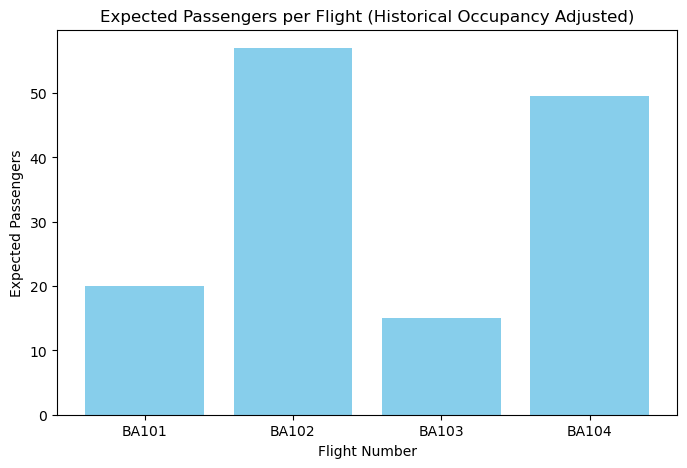

In [78]:
plt.figure(figsize=(8,5))
plt.bar(lookup_df['flight_no'], lookup_df['expected_passengers'], color='skyblue')
plt.title('Expected Passengers per Flight (Historical Occupancy Adjusted)')
plt.xlabel('Flight Number')
plt.ylabel('Expected Passengers')
plt.show()